## Explore overlaps

To generate some of the visualization in this notebook install ```tnia-python```

```
pip install tnia-python
```

In this notebook we run simrecon and save the overlaps.  

The overlaps are calculated as follows

$ \tilde{D}_m(\mathbf{k} + m \mathbf{p})O_0(\mathbf{k}) $  
   
$ \tilde{D}_0(\mathbf{k})O_m(  \mathbf{k} + m \mathbf{p} ) $

Where ${D}$ is the data and ${O}$ the OTF.   Each $\tilde{D}_m$ contains a factor $O_m$ from the observation process, thus the two expressions would be expected to be equal for the correct shift vector $\mathbf{p}$.

In this notebook we run ```simrecon``` and output the overlaps.  The overlaps are output in real space.  We load back the overlaps and perform cross correlation using the same approach as in the ```findk0``` function of ```simrecon.c```.  The result of each correlation should have a peak at the location of the shift vector $\mathbf{p}$.   The location of the peak should also correspond to the reported value(s) the output text file.  This notebook can be used to verify that the shift vectors are correct. 


## Set up import paths

In [4]:
import mrc as Mrc
import numpy as np
from tnia.plotting.projections import show_xyz_slice, show_xyz_max
import os
import sys 
import matplotlib.pyplot as plt

computer = 'bnort'

if computer == 'default':
    sys.path.insert(1, 'Y:\Cryo_data2\Data Processing Notebooks')
    sys.path.insert(1, 'Y:\Cryo_data2\Data Processing Notebooks\Scripts')
elif computer == 'bnort':
    sys.path.insert(1, r'C:\Users\bnort\work\Janelia\code\\simrecon\scripts\Scripts')
    sys.path.insert(1, r'C:\Users\bnort\work\Janelia\code\\simrecon\scripts')
else:
    pass

from simrecon_utils import simrecon

## Choose a test set

Note:  Paths may need to be changed to reflect location of data on local computer. 

In [5]:
from email.mime import base


test_set_num = 3

if test_set_num == 0:

    home = r'D:\Janelia\Data 2024-06-12'
    input_name = os.path.join(home, r'rois_0\roi_128.mrc')
    otf_name = os.path.join(home, r'561nm OTF used\560 201909_19-20_best.mrc')
    wl = 561
if test_set_num == 1:
    home = r'D:\Janelia\Data 2024-06-12'
    input_name = os.path.join(home, r'rois_0\roi_256.mrc')
    otf_name = os.path.join(home, r'561nm OTF used\560 201909_19-20_best.mrc')
    wl = 561
elif test_set_num == 2:

    home = r'D:\Janelia\cudasirecon_test_data'
    input_name = os.path.join(home, r'raw.dv')
    otf_name = os.path.join(home, r'otf.dv')

elif test_set_num == 3:
    home = r'D:\Janelia\Data 2024-06-12'
    input_name = os.path.join(home, r'data\561nm WF correlation image 2_20240521_162301\560 nm 655 40 filter 5 phases 0.81 NA React_All Linear SIM_cam1_1.mrc')
    otf_name = os.path.join(home, r'561nm OTF used\560 201909_19-20_best.mrc')
    wl = 561

elif test_set_num == 4:
    home = r'D:\Janelia\Data 2024-06-10'
    input_name = os.path.join(home, r'Brian test\561nm cells after Lc correct polarisation parameter test\560 nm 655 40 filter 5 phases 0.81 NA React_All Linear SIM_cam1_1.mrc')
    otf_name = os.path.join(r'D:\Janelia\Data 2024-06-12', r'561nm OTF used\560 201909_19-20_best.mrc')
    output_name = os.path.join(home, r'temp\temp_full.mrc')
    overlap_name = os.path.join(home, r'temp\overlaps_full.mrc')
    wl = 561

base_name = os.path.basename(input_name)
output_base_name = base_name.replace('.mrc', '_output.mrc')
overlap_base_name = base_name.replace('.mrc', '_overlaps.mrc')
output_name = os.path.join(home, f'temp\{output_base_name}')
overlap_name = os.path.join(home, f'temp\{overlap_base_name}')
print(overlap_name)
#output_name = os.path.join(home, f'temp\{base_name}')

D:\Janelia\Data 2024-06-12\temp\560 nm 655 40 filter 5 phases 0.81 NA React_All Linear SIM_cam1_1_overlaps.mrc


## Define simrecon settings

In [6]:
ls= (wl/1000)/2/0.81

print('line spacing', ls)

line spacing 0.3462962962962963


In [7]:
sim_kwargs = dict(
                    nphases=5,
                    ndirs=3,
                    angle0= 1.29,
                    negDangle=True,
                    ls= ls,              
                    na= 0.85,
                    nimm= 1.0,
                    zoomfact= 2.0, 
                    background= 100.0,           
                    wiener= 0.007,
                    fastSIM=True,
                    otfRA= True,
                    dampenOrder0=True,
                    k0searchall=True,
                    equalizez=True,
                    preciseapo=True,
                    gammaApo=0.3,
                    suppressR=15,
                    nthreads = 8,
                    input_file= input_name,
                    output_file = output_name, 
                    otf_file = otf_name,
                    saveoverlaps = overlap_name
                )          

## Run simrecon

Note:  When run with saveoverlaps set ```simrecon``` does not perform full reconstruction but exits after saving the overlaps.  It will still return the output text which will contain info regarding the optimization of the shift vector, amplitude and phase search.  This output can be displayed for trouble shooting. 

In [8]:
sim_output = simrecon(**sim_kwargs)

## Read back the saved overlaps

In [9]:
overlap = Mrc.Mrc(overlap_name)
overlap= overlap.data
print(overlap.shape, overlap.dtype)
print(overlap.min(), overlap.max())

(195, 2, 1024, 1024) >c8
(-144.29298+13.243779j) (141.84726+17.494349j)


In [10]:
dirs = 3
orders = 2
nz = int(overlap.shape[0]/dirs)
ny = overlap.shape[2]
nx = overlap.shape[3]
print(nz, ny, nx)

65 1024 1024


## Visualize the overlaps

Overlaps are saved as spatial domain arrays.

(65, 1024, 1024)
1.5013028e-10 1771.2958


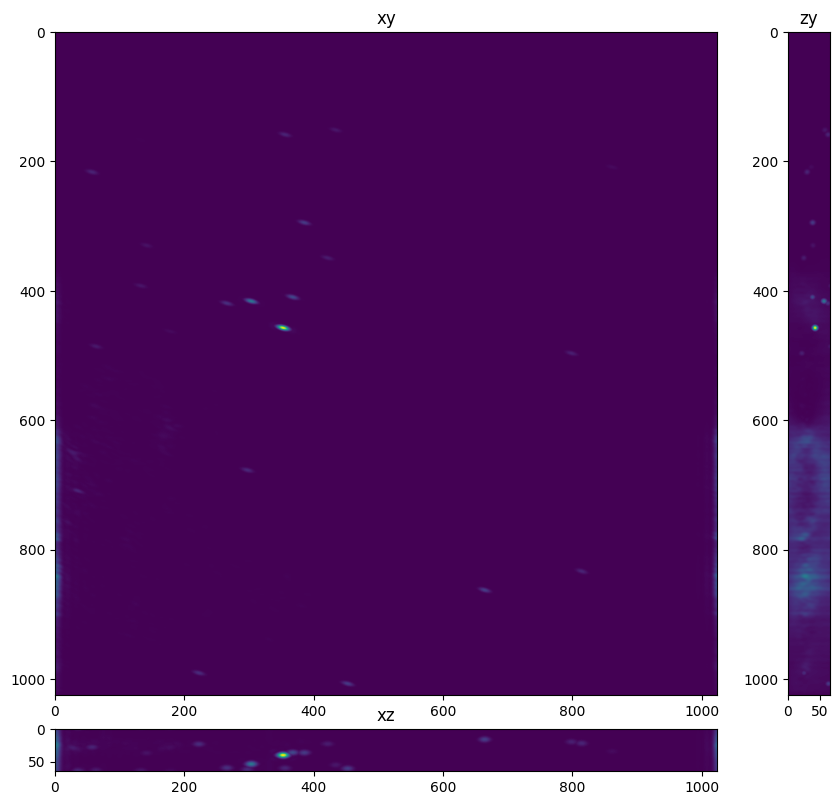

In [11]:
dir = 1
order = 0  
overlap1 = overlap[dir*nz:(dir+1)*nz, order, :, :]
print(overlap1.shape)

overlap1 = np.abs(overlap1)**2
print(overlap1.min(), overlap1.max())
#overlap1 = np.log(overlap1)

zc, yc, xc = overlap1.shape[0]//2, overlap1.shape[1]//2, overlap1.shape[2]//2
#fig = show_xyz_slice(overlap1, 0, 0, 0)
fig = show_xyz_max(overlap1)


## Perform cross correlation between overlap order 0 and order 1

Perform cross correlation using the same approach as in the ```findk0``` function of ```simrecon.c```.  The result of each correlation should have a peak at the location of the shift vector $\mathbf{p}$.   The location of the peak should also correspond to the reported value(s) the output text file.  This notebook can be used to verify that the shift vectors are correct. 

In [12]:
## get the input directory
print(input_name)
input_dir = os.path.dirname(input_name)
print(home)
print(input_dir)

figure_path = os.path.join(input_dir, 'overlap_figures')
if not os.path.exists(figure_path):
    os.mkdir(figure_path)
print(figure_path)

base_name = os.path.basename(input_name)
base_name = base_name.replace('.mrc', '')
print(base_name)


D:\Janelia\Data 2024-06-12\data\561nm WF correlation image 2_20240521_162301\560 nm 655 40 filter 5 phases 0.81 NA React_All Linear SIM_cam1_1.mrc
D:\Janelia\Data 2024-06-12
D:\Janelia\Data 2024-06-12\data\561nm WF correlation image 2_20240521_162301
D:\Janelia\Data 2024-06-12\data\561nm WF correlation image 2_20240521_162301\overlap_figures
560 nm 655 40 filter 5 phases 0.81 NA React_All Linear SIM_cam1_1


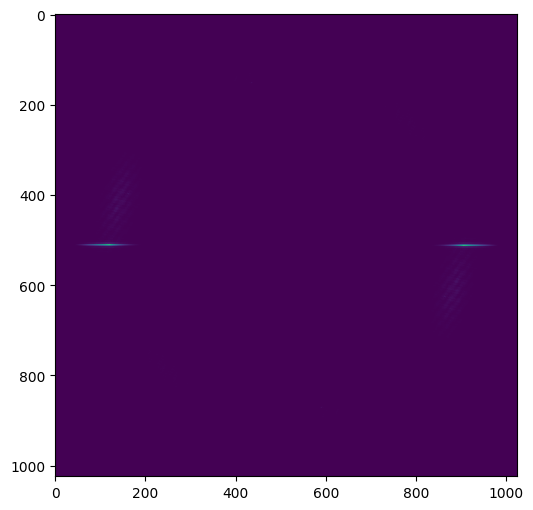

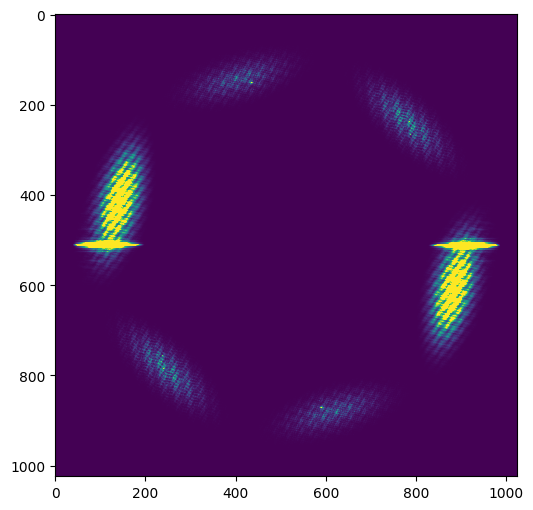

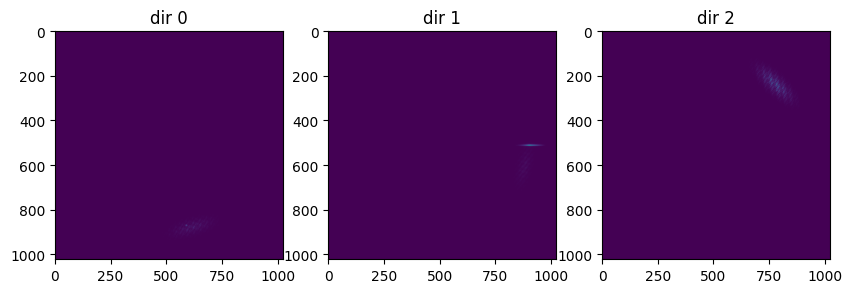

In [13]:
from tnia.plotting.plt_helper import imshow_multi2d, imshow2d


crosscors = []

for dir in range(dirs):
    overlap0 = overlap[dir*nz:(dir+1)*nz, 0, :, :]
    overlap1 = overlap[dir*nz:(dir+1)*nz, 1, :, :]

    crosscor_c = np.zeros((ny,nx), overlap.dtype)

    for z in range(nz):
        crosscor_c = crosscor_c + overlap0[z]*np.conj(overlap1[z])

    crosscor = np.fft.fftn(crosscor_c)
    crosscor = np.fft.fftshift(crosscor)
    crosscor = np.abs(crosscor)**2
    crosscors.append(crosscor)

crosscors_arr = np.array(crosscors)
crosscors_arr = np.max(crosscors_arr, axis = 0)
temp = crosscors_arr[::-1,::-1]
crosscors_arr = crosscors_arr + temp

fig=imshow2d(crosscors_arr, vmax = crosscors_arr.max())
fig.savefig(os.path.join(figure_path, f'{base_name}_crosscor_all.png'))
fig=imshow2d(crosscors_arr, vmax = crosscors_arr.max()/100)
fig.savefig(os.path.join(figure_path, f'{base_name}_crosscor_all_enhanced.png'))

fig = imshow_multi2d(crosscors, ['dir 0', 'dir 1', 'dir 2'], 1, 3)
fig.savefig(os.path.join(figure_path, f'{base_name}_crosscor.png'))

In [14]:
for line in sim_output:
    print(line)

nphases=5, ndirs=3
nx=1024, ny=1024, nz=65, nwaves=1, ntimes=1
nzotf=65, dkzotf=0.061538, nxotf=65, nyotf=1, dkrotf=0.060096
Number of threads used: 8
Creating FFT plans...
Separation matrix:
  1.00000   1.00000   1.00000   1.00000   1.00000 
  1.00000   0.30902  -0.80902  -0.80902   0.30902 
  0.00000   0.95106   0.58779  -0.58779  -0.95106 
  1.00000  -0.80902   0.30902   0.30902  -0.80902 
  0.00000   0.58779  -0.95106   0.95106  -0.58779 

rdistcutoff = 2.905983 1/micron
k0guess[direction 0] = (0.400121, 1.387302) 1/micron
Initial guess by findk0() of k0[direction 0] = (0.288764,1.350784) 1/micron
before fitk0andmodamp
 In getmodamp: angle=1.360191, mag=1.381304, amp=0.911509, phase=1.517790
 In getmodamp: angle=1.361191, mag=1.381304, amp=0.854641, phase=2.299664
 In getmodamp: angle=1.359191, mag=1.381304, amp=0.840384, phase=0.769766
 In getmodamp: angle=1.360245, mag=1.381304, amp=0.911222, phase=1.558203
 In getmodamp: angle=1.360245, mag=1.382056, amp=0.860586, phase=1.645141

In [24]:
import napari
viewer = napari.Viewer()
#viewer.add_image(fft_overlap0)
#viewer.add_image(fft_overlaps)
overlap_abs = np.abs(overlap)**2
viewer.add_image(overlap_abs)

1

In [25]:
sim_output

['']